# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [168]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [169]:
%pip install --upgrade plotly

### Import Statements

In [170]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [171]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [172]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [173]:
df_data.shape
print(f"df_data has {df_data.shape[0]} rows and {df_data.shape[1]} columns")

df_data has 4324 rows and 9 columns


In [174]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [175]:
print(f'Are there any duplicates?  {df_data.duplicated().any()}')

Are there any duplicates?  False


In [176]:
print(f'Are there any Nan values?  {df_data.isna().values.any()}')

Are there any Nan values?  True


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [177]:
print('Which columns tend to have NaN values?')
df_data.isna().sum()

Which columns tend to have NaN values?


,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [178]:
df_data_clean = df_data.drop(['Unnamed: 0.1'], axis=1)
df_data_clean.head()

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [179]:
df_data_clean.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df_data_clean.head()

,Index,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [180]:
df_data['Price'] = df_data['Price'].astype(str).str.replace(',', '', regex=False)
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

## Descriptive Statistics

In [181]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           4324 non-null   int64 
 1   Organisation    4324 non-null   object
 2   Location        4324 non-null   object
 3   Date            4324 non-null   object
 4   Detail          4324 non-null   object
 5   Rocket_Status   4324 non-null   object
 6   Price           964 non-null    object
 7   Mission_Status  4324 non-null   object
dtypes: int64(1), object(7)
memory usage: 270.4+ KB


In [182]:
df_data_clean.describe()  # Will get only numerical columns statistics

,Index
count,"4,324.00"
mean,"2,161.50"
std,"1,248.38"
min,0.00
25%,"1,080.75"
50%,"2,161.50"
75%,"3,242.25"
max,"4,323.00"


In [183]:
df_data_clean.describe(include='object')  # Will get only object columns (non-numerical) statistics

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Aug 28, 1990 09:05 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [184]:
top_20_companies = df_data_clean['Organisation'].value_counts()[:20]
top_20_companies = top_20_companies.sort_values(ascending=True)
top_20_companies

,count
Organisation,
Kosmotras,22
ISAS,30
Sea Launch,36
ILS,46
Roscosmos,55
ISRO,76
Lockheed,79
Northrop,83
MHI,84


In [185]:
h_bar = px.bar(top_20_companies,
               x=top_20_companies.values,
               y=top_20_companies.index,
               color=top_20_companies,
               color_continuous_scale='Teal',
              #  color_discrete_sequence=['#54A24B']  # One single color
               )

h_bar.update_layout(title='Number of Launches by Organisation',
                    xaxis_title='Number of Launches',
                    yaxis_title='Organisation')

h_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [186]:
rockets_status = df_data_clean.Rocket_Status.value_counts()
rockets_status

,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


In [187]:
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data=[go.Pie(labels=rockets_status.index,
                             values=rockets_status.values,
                             )])
fig.update_traces(hoverinfo='label+percent',
                  textinfo='value',
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title='Number of Active vs. Inactive Rockets')

fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [188]:
df_data_clean.Mission_Status.unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [189]:
success_count = (df_data_clean['Mission_Status'] == 'Success').sum()

failures_count = df_data_clean['Mission_Status'][df_data_clean['Mission_Status'] != 'Success'].value_counts()

print(f"Success count:{success_count},\n {failures_count}")

Success count:3879,
 Mission_Status
Failure              339
Partial Failure      102
Prelaunch Failure      4
Name: count, dtype: int64


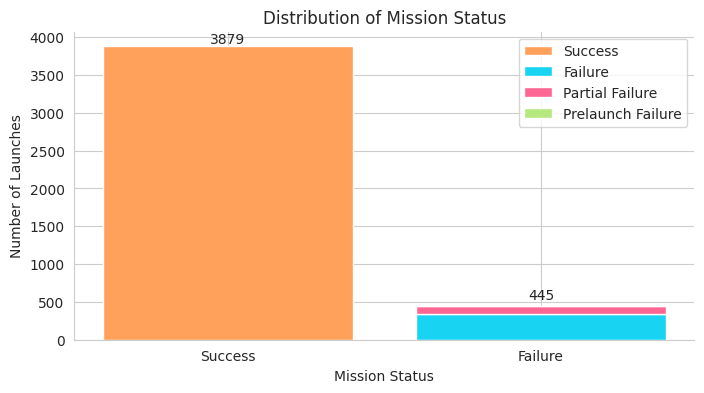

In [190]:
colors = [ '#FFA15A', '#19D3F3', '#FF6692', '#B6E880']
fig, ax = plt.subplots(figsize=(8,4))

ax.bar('Success', success_count, color=colors[0], label='Success')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

bottom = 0
failure_bars = []
for i, (failure_type, count) in enumerate(failures_count.items()):
  color_index = min(i+1, len(colors)-1)
  bar = ax.bar('Failure', count, bottom=bottom, color=colors[color_index], label=failure_type)
  failure_bars.append(bar)
  bottom += count

ax.bar_label(ax.containers[0], fmt='%.0f')
if bottom > 0:
    ax.bar_label(failure_bars[-1], fmt='%d', padding=3)

ax.set_xlabel('Mission Status')
ax.set_ylabel('Number of Launches')
ax.set_title('Distribution of Mission Status')
ax.legend()

plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [191]:
df_prices = df_data.dropna(subset=['Price'])

price_valid_rows = df_prices.Price.count()
total_rows = df_data.Mission_Status.count()
percentage_of_valid_price_values = price_valid_rows / total_rows * 100
print(f"Percentage of valid price values: {percentage_of_valid_price_values:.2f}%")

sorted_prices = df_prices.sort_values('Price', ascending=True)

Percentage of valid price values: 22.29%


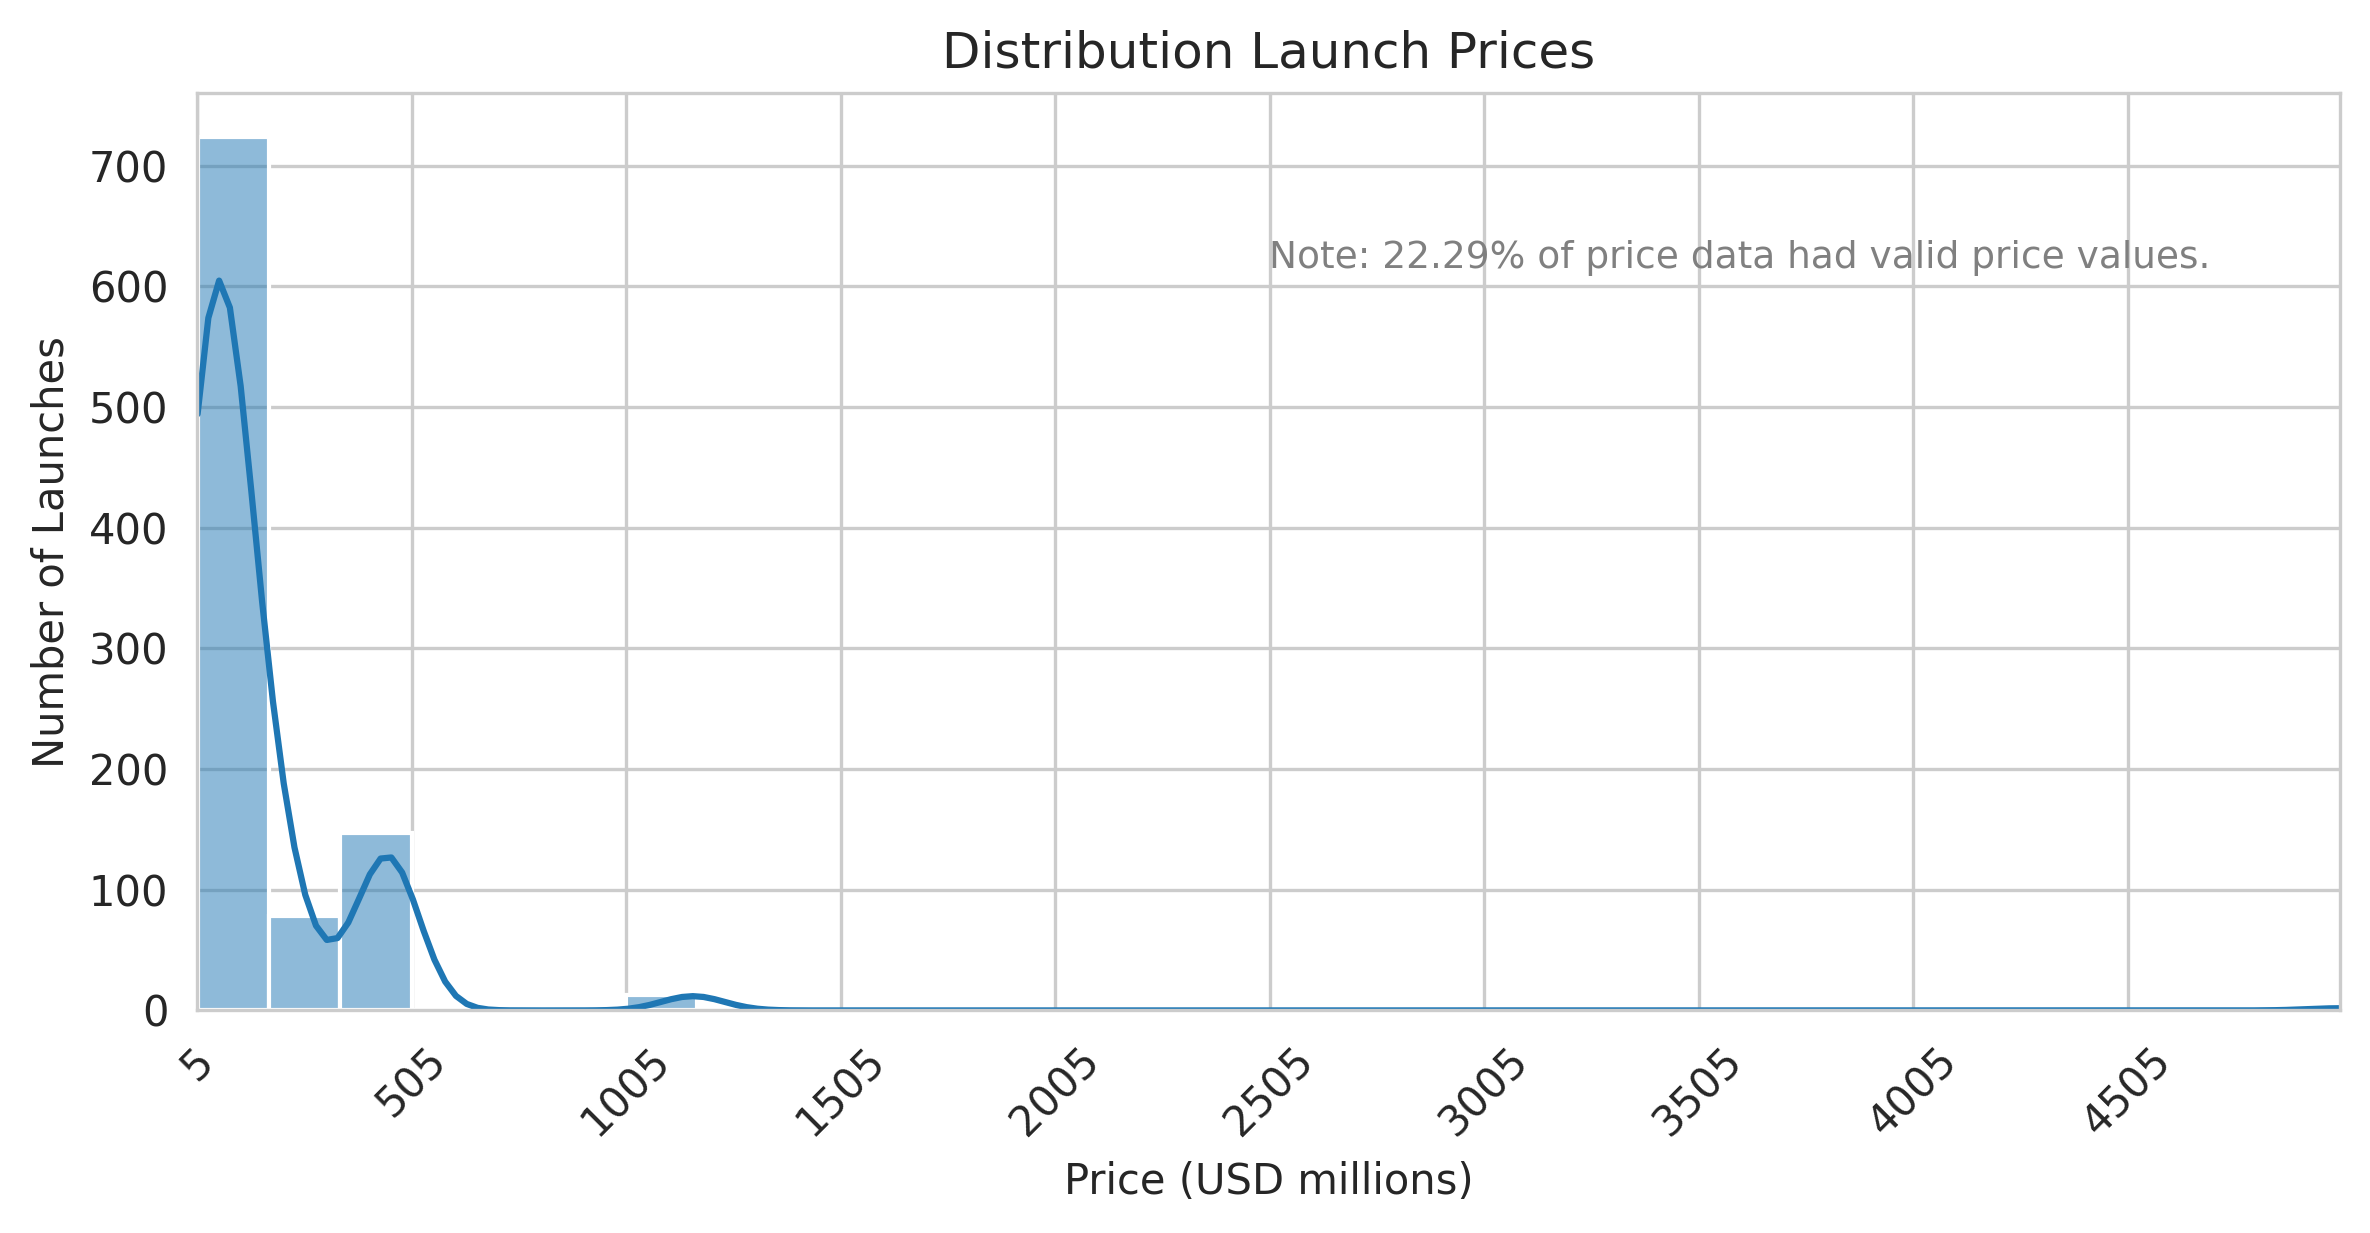

In [192]:
import math
min_price = sorted_prices.Price.min()
max_price = sorted_prices.Price.max()
start = math.floor(min_price)
end = math.ceil(max_price)


plt.figure(figsize=(8,4), dpi=300)

sns.histplot(data=sorted_prices,
             x=sorted_prices.Price,
             bins=30,
             kde=True)

plt.xlim(start, end)
xtick_values = np.arange(start, end+1, 500)
plt.xticks(xtick_values, rotation=45)

plt.tight_layout()
plt.xlabel('Price (USD millions)')
plt.ylabel('Number of Launches')
plt.title('Distribution Launch Prices')

# Add disclaimer:
plt.text(
    0.5, 0.8,  # Position (relative).
    f'Note: {percentage_of_valid_price_values:.2f}% of price data had valid price values.',
    transform=plt.gca().transAxes,
    fontsize=9,
    color='gray',
    ha='left',
    va='bottom'
)

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [193]:
Country = df_data_clean.Location.str.rsplit(',', n=1).str[-1].str.strip()
pacific_ocean_rows = df_data_clean[Country == 'Pacific Ocean']

In [194]:
manual_corrections = {
        "Russia": "RU",                          # Russia is the Russian Federation
        "New Mexico": "US",                      # New Mexico should be USA
        "Yellow Sea": "CN",                      # Yellow Sea refers to China
        "Shahrud Missile Test Site": "IR",        # Shahrud Missile Test Site should be Iran
        "Pacific Missile Range Facility": "US",   # Pacific Missile Range Facility should be USA
        "Barents Sea": "RU",                     # Barents Sea should be Russian Federation
        "Gran Canaria": "US",                     # Gran Canaria should be USA
        "North Korea": "KP",
        "South Korea": "KR",
        "Iran": "IR",
        "Pacific Ocean": "KI",                   # Pacific Ocean (LP Odyssey, Kiritimati Launch Area) should be Kiribati
    }

In [195]:
def map_to_iso(country_name):
        if pd.isna(country_name):
            return None
        corrected = manual_corrections.get(country_name, country_name)
        try:
            return countries.get(corrected).alpha3
        except KeyError:
            print(f"País no encontrado: {corrected}")
            return None

# Mapear a ISO
iso_codes = Country.apply(map_to_iso)
df_data_clean['Country_ISO'] = iso_codes

In [196]:
ISO_counts = df_data_clean["Country_ISO"].value_counts()
ISO_counts_reset = ISO_counts.reset_index()
ISO_counts_reset.head()

,Country_ISO,count
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269
5,JPN,126
6,IND,76
7,KIR,36
8,IRN,14
9,NZL,13


In [197]:
fig = go.Figure(data=go.Choropleth(
    locations = ISO_counts_reset["Country_ISO"],
    z = ISO_counts_reset["count"],
    colorscale='YlGn',
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Number of launches',
))

fig.update_layout(
    title_text='Number of Launches by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [198]:
failed_missions_df = df_data_clean[df_data_clean["Mission_Status"] != 'Success']
ISO_counts_failed = failed_missions_df["Country_ISO"].value_counts()
ISO_counts_failed_reset = ISO_counts_failed.reset_index()
ISO_counts_failed_reset.head()

,Country_ISO,count
0,USA,163
1,KAZ,93
2,RUS,93
3,CHN,25
4,FRA,18
5,JPN,13
6,IND,13
7,IRN,9
8,AUS,3
9,KIR,3


In [199]:
fig = go.Figure(data=go.Choropleth(
    locations = ISO_counts_failed_reset["Country_ISO"],
    z = ISO_counts_failed_reset["count"],
    colorscale='BuPu',
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Failed launches',
))

fig.update_layout(
    title_text='Failed Launches by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [200]:
grouped_columns_df = df_data_clean.groupby(['Country_ISO', 'Organisation', 'Mission_Status']).size().reset_index(name="count")
grouped_columns_df.head()

,Country_ISO,Organisation,Mission_Status,count
0,AUS,AMBA,Success,1
1,AUS,CECLES,Failure,2
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [201]:
# Create the unique modes
countries = grouped_columns_df["Country_ISO"].unique()
organisations = grouped_columns_df[['Country_ISO', 'Organisation']].drop_duplicates()
mission_statuses = grouped_columns_df[['Country_ISO', 'Organisation', 'Mission_Status', 'count']]

# Create nodes for the sunburst chart
sunburst_data = []

# Level 1: Country
for country in countries:
    sunburst_data.append({
        'ids': country,
        'labels': country,
        'parents': '',
    })

# Level 2: Organisation
for _, row in organisations.iterrows():
    sunburst_data.append({
        'ids': f"{row['Country_ISO']}-{row['Organisation']}",
        'labels': row['Organisation'],
        'parents': row['Country_ISO'],
    })

# Level 3: Mission status
for _, row in mission_statuses.iterrows():
    sunburst_data.append({
        'ids': f"{row['Country_ISO']}-{row['Organisation']}-{row['Mission_Status']}",
        'labels': row['Mission_Status'],
        'parents': f"{row['Country_ISO']}-{row['Organisation']}",
        'values': row['count']
    })

# Convertir a DataFrame
sunburst_df = pd.DataFrame(sunburst_data)


In [202]:
fig = go.Figure(go.Sunburst(
    ids=sunburst_df['ids'],
    labels=sunburst_df['labels'],
    parents=sunburst_df['parents'],
    values=sunburst_df.get('value', None),
    insidetextorientation='radial',
    maxdepth=-1
))

fig.update_layout(
    margin=dict(t=10, l=10, r=10, b=10)
)

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [203]:
organisations_investment = sorted_prices.groupby('Organisation')['Price'].sum().sort_values(ascending=False)
organisations_investment.head()

,Price
Organisation,
NASA,"76,280.00"
Arianespace,"16,345.00"
ULA,"14,798.00"
RVSN USSR,"10,000.00"
CASC,"6,340.26"
SpaceX,"5,444.00"
Northrop,"3,930.00"
MHI,"3,532.50"
ISRO,"2,177.00"


In [204]:
df = px.data.gapminder()
fig = px.bar(organisations_investment,
             x=organisations_investment.index,
             y=organisations_investment.values,
             color=organisations_investment,
             color_continuous_scale='deep',
             labels={'pop':'Amount of Money Spent by Organisation on Space Missions'}, height=400)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [205]:
sorted_prices.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
487,487,487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
249,249,249,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Apr 26, 2018 04:42 UTC",Long March 11 | Zhuhai-1 2A to 2D,StatusActive,5.30,Success
102,102,102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,281,281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
166,166,166,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Mon Jan 21, 2019 05:42 UTC",Long March 11 | Jilin-1 Hyperspectral & Others,StatusActive,5.30,Success


In [206]:
fig = px.bar(
    sorted_prices,
    x='Organisation',
    y='Price',
    color='Detail',
    labels={'Price': 'Launch Price'},
    title='Money Spent by Organisation per Launch',
    height=500
)

fig.update_layout(barmode='stack')
fig.show()

# Chart the Number of Launches per Year

In [207]:
# Convert Date column to datetime

# Custom function to parse 2 types of Dates present in the Date column
def parse_date(date_str):
    try:
        # Long format from the csv: 'Tue Feb 05, 2019 21:01 UTC'
        return pd.to_datetime(date_str, format='%a %b %d, %Y %H:%M UTC')
    except:
        # Short format from the csv: 'Tue Feb 05, 2019'
        try:
          return pd.to_datetime(date_str, format='%a %b %d, %Y')
        except:
          #If both fail, try automatic method
          return pd.to_datetime(date_str, errors='coerce')

df_data_clean['Date'] = df_data_clean['Date'].apply(parse_date)
# print(df_data_clean['Date'].isna().sum())

# Extract year and create new Year column
df_data_clean['Year'] = df_data_clean['Date'].dt.year.astype('Int64')
df_data_clean['Month'] = df_data_clean['Date'].dt.month.astype('Int64')

,Index,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_ISO,Year,Month
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,8
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,8
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,2020,7
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,7


In [208]:
launches_per_year = df_data_clean.groupby('Year').size().reset_index(name='count')
launches_per_year.head()

,Year,count
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


In [209]:
fig = px.histogram(launches_per_year,
                   x='Year',
                   y='count',
                   title='Number of Launches per Year',
                   color_discrete_sequence=['skyblue'])

fig.update_layout(bargap=0.2,
                  xaxis_title='Year',
                  yaxis_title='Number of Launches')

fig.update_xaxes(
    type='category',
    categoryorder='array',
    categoryarray=launches_per_year['Year'].tolist(),
    tickmode='array',
    tickvals=launches_per_year['Year'].tolist(),
    ticktext=launches_per_year['Year'].astype(str).tolist()
)

fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [210]:
# Extract Year_Month of each date to create a temporal series
df_data_clean['Year_Month'] = df_data_clean['Date'].dt.to_period('M')

# Count launches per month
monthly_launches = df_data_clean.groupby('Year_Month').size().reset_index(name='launches_count')
monthly_launches['Year_Month'] = monthly_launches['Year_Month'].dt.to_timestamp()

# Order by date for correct visualization
monthly_launches = monthly_launches.sort_values('Year_Month')
monthly_launches.tail()

,Year_Month,launches_count
742,2020-04-01,5
743,2020-05-01,9
744,2020-06-01,7
745,2020-07-01,14
746,2020-08-01,3


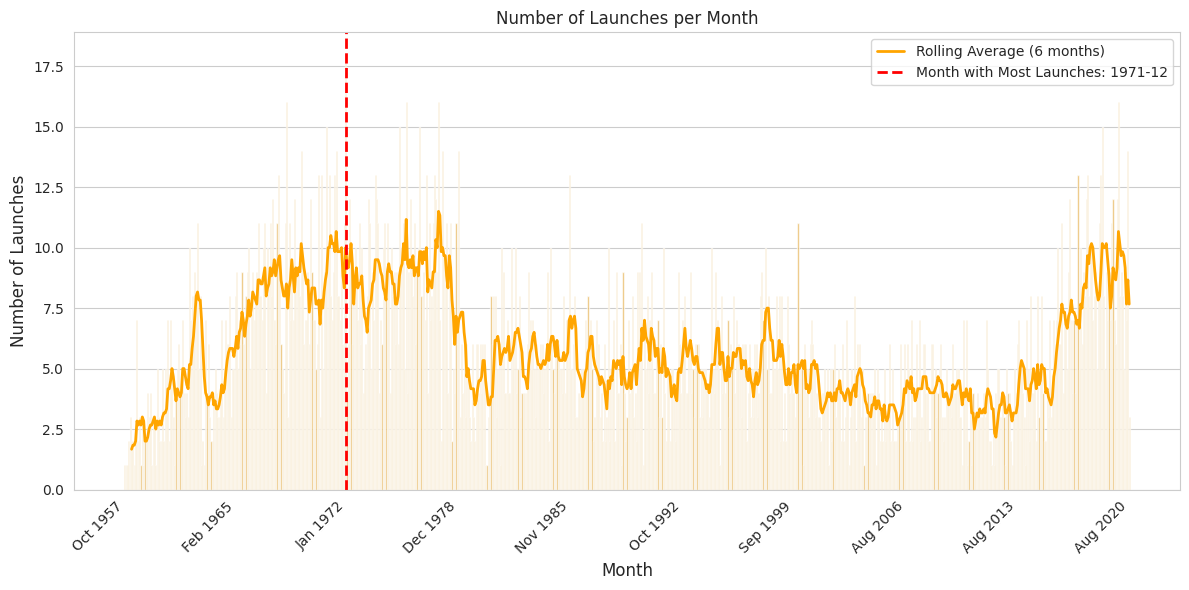

In [211]:
# Calculate rolling average (6 months)
window_size = 6
monthly_launches['rolling_average'] = monthly_launches['launches_count'].rolling(window=window_size, center=False).mean()

# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Bar graph to show launches per month
ax = sns.barplot(x='Year_Month', y='launches_count', data=monthly_launches, alpha=0.7, color='orange')

# Line graph to show rolling average
plt.plot(range(len(monthly_launches)), monthly_launches['rolling_average'], color='orange', linewidth=2, label=f'Rolling Average ({window_size} months)')

# Find the month with most launches
max_month = monthly_launches.loc[monthly_launches['launches_count'].idxmax()]
max_month_index = monthly_launches['launches_count'].idxmax()

plt.axvline(x=max_month_index,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Month with Most Launches: {max_month["Year_Month"].strftime("%Y-%m")}')

plt.title('Number of Launches per Month')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)

# Format x-axis ticks with proper month names and years
# Select fewer ticks to avoid overcrowding - approximately 10-12 labels
num_ticks = 10
tick_positions = np.linspace(0, len(monthly_launches)-1, num_ticks).astype(int)

# Format ticks to show month name and year
tick_labels = [monthly_launches['Year_Month'].iloc[pos].strftime('%b %Y') for pos in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

<ipython-input-212-727973273>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




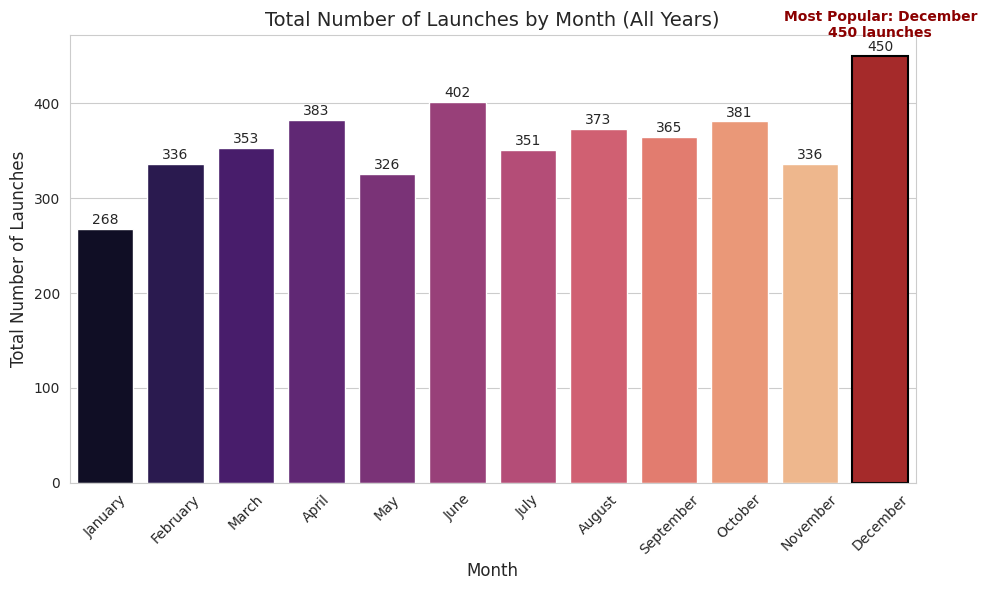

In [212]:
#  Create a monthly popularity visualization

# Extract month from the Year_Month column and count launches by month
monthly_launches['Month'] = monthly_launches['Year_Month'].dt.month
monthly_popularity = monthly_launches.groupby('Month')['launches_count'].sum().reset_index()

# Add month names
month_names = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
               7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
monthly_popularity['Month_Name'] = monthly_popularity['Month'].map(month_names)

# Sort by month number to maintain chronological order
monthly_popularity = monthly_popularity.sort_values('Month')

# Create visualization
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Bar plot of launches by month
ax = sns.barplot(x='Month_Name', y='launches_count', data=monthly_popularity, palette='magma')

# Highlight the month with the most launches
max_month = monthly_popularity.loc[monthly_popularity['launches_count'].idxmax()]
max_bar = ax.patches[max_month['Month']-1]  # -1 because months are 1-indexed
max_bar.set_facecolor('brown')
max_bar.set_edgecolor('black')
max_bar.set_linewidth(1.5)

# Add value labels on top of each bar
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 5,
            f"{int(bar.get_height())}",
            ha='center', fontsize=10)

# Add annotation for the most popular month
plt.text(max_month['Month']-1, max_month['launches_count'] + 20,
         f"Most Popular: {max_month['Month_Name']}\n{int(max_month['launches_count'])} launches",
         ha='center', fontweight='bold', color='darkred')

plt.title('Total Number of Launches by Month (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Number of Launches', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [213]:
# First, group by Year_Month
df_data_clean['Price'] = pd.to_numeric(df_data_clean['Price'], errors='coerce')  # To ignore NaN values
df_data_clean['Year_Month_dt'] = df_data_clean['Year_Month'].dt.to_timestamp()
monthly_price = df_data_clean.groupby('Year_Month_dt')['Price'].mean().reset_index()
monthly_price.head()

,Year_Month_dt,Price
0,1957-10-01,NaN
1,1957-11-01,NaN
2,1957-12-01,NaN
3,1958-02-01,NaN
4,1958-03-01,NaN


Note: 22.29% of price data had valid price values.


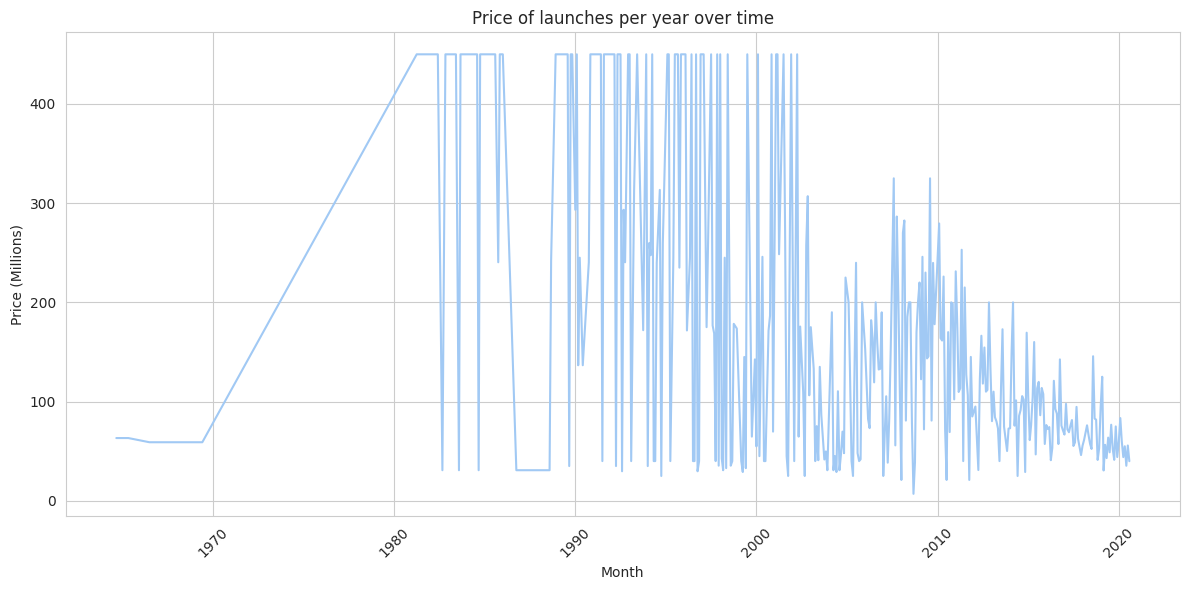

In [231]:
print(f'Note: {percentage_of_valid_price_values:.2f}% of price data had valid price values.')

# 6 months rolling average
monthly_price['rolling_average'] = monthly_price['Price'].rolling(window=6, min_periods=1).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_price, x='Year_Month_dt', y='Price', color='#a1c9f4')
plt.title('Price of launches per year over time')
plt.xlabel('Month')
plt.ylabel('Price (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [215]:
# Get top 10 company names
top_10_companies = df_data_clean['Organisation'].value_counts()[:10].sort_values(ascending=True)
top_10_names = top_10_companies.index.to_list()

# Filter the data frame for the top 10 companies only
df_top_10 = df_data_clean[df_data_clean['Organisation'].isin(top_10_names)]

# Group by Year_Month and Organization
top_10_launches = df_top_10.groupby(['Year_Month_dt', 'Organisation']).size().reset_index(name='launches_count')
top_10_launches.tail()

,Year_Month_dt,Organisation,launches_count
1735,2020-05-01,VKS RF,1
1736,2020-06-01,CASC,3
1737,2020-07-01,CASC,5
1738,2020-07-01,ULA,1
1739,2020-08-01,CASC,1


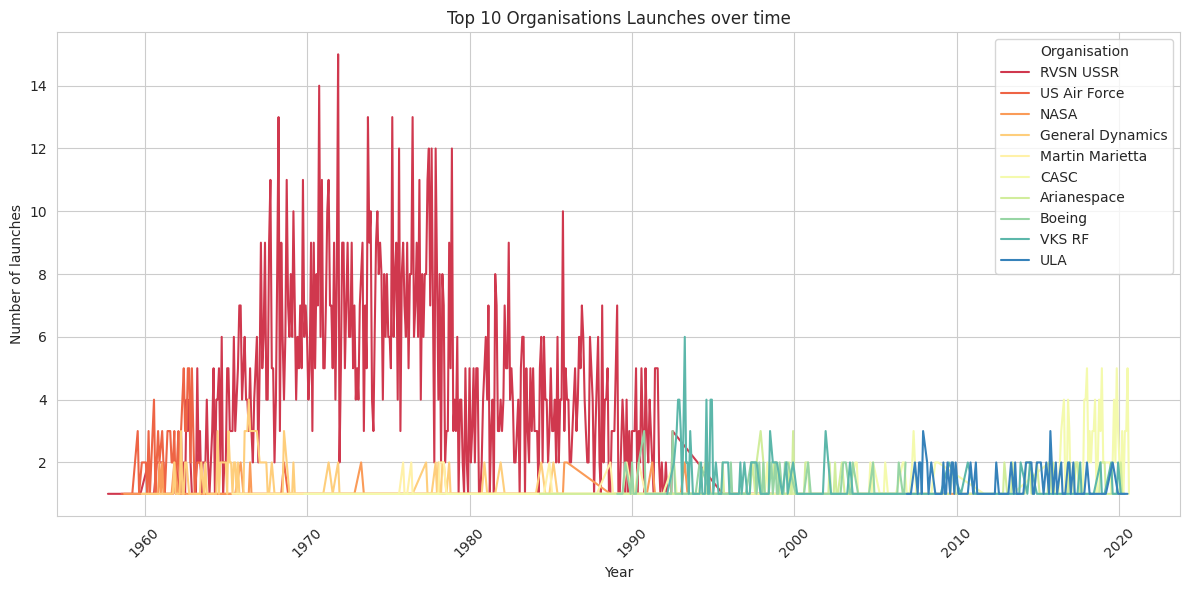

In [216]:
# Create visualization
plt.figure(figsize=(12, 6))

sns.lineplot(data=top_10_launches, x='Year_Month_dt', y='launches_count', hue='Organisation', palette='Spectral')

plt.title('Top 10 Organisations Launches over time')
plt.xlabel('Year')
plt.ylabel('Number of launches')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [217]:
# Filter the data frame for USA and USSR launches only
cold_war_launches = df_data_clean[df_data_clean['Country_ISO'].isin(['USA', 'RUS', 'KAZ'])]
cold_war_launches = cold_war_launches[cold_war_launches['Year_Month_dt'] < '1992-01-01']
# New Bloc column to be able to group by USSR of USA
cold_war_launches['Bloc'] = cold_war_launches['Country_ISO'].replace({'RUS': 'USSR', 'KAZ': 'USSR', 'USA': 'USA'})
# Group by bloc and date (Year_Month_dt & Bloc)
grouped_by_bloc = cold_war_launches.groupby(['Year_Month_dt', 'Bloc']).size().reset_index(name='count')
grouped_by_bloc.head()

,Year_Month_dt,Bloc,count
0,1957-10-01,USSR,1
1,1957-11-01,USSR,1
2,1957-12-01,USA,1
3,1958-02-01,USA,2
4,1958-03-01,USA,3


In [218]:
# Make Countries the headers of the columns
pivot_cold_war_launches = grouped_by_bloc.pivot(index='Year_Month_dt', columns='Bloc', values='count')
pivot_cold_war_launches = pivot_cold_war_launches.fillna(0)
pivot_cold_war_launches.head()

Bloc,USA,USSR
Year_Month_dt,,
1957-10-01,0.00,1.00
1957-11-01,0.00,1.00
1957-12-01,1.00,0.00
1958-02-01,2.00,0.00
1958-03-01,3.00,0.00


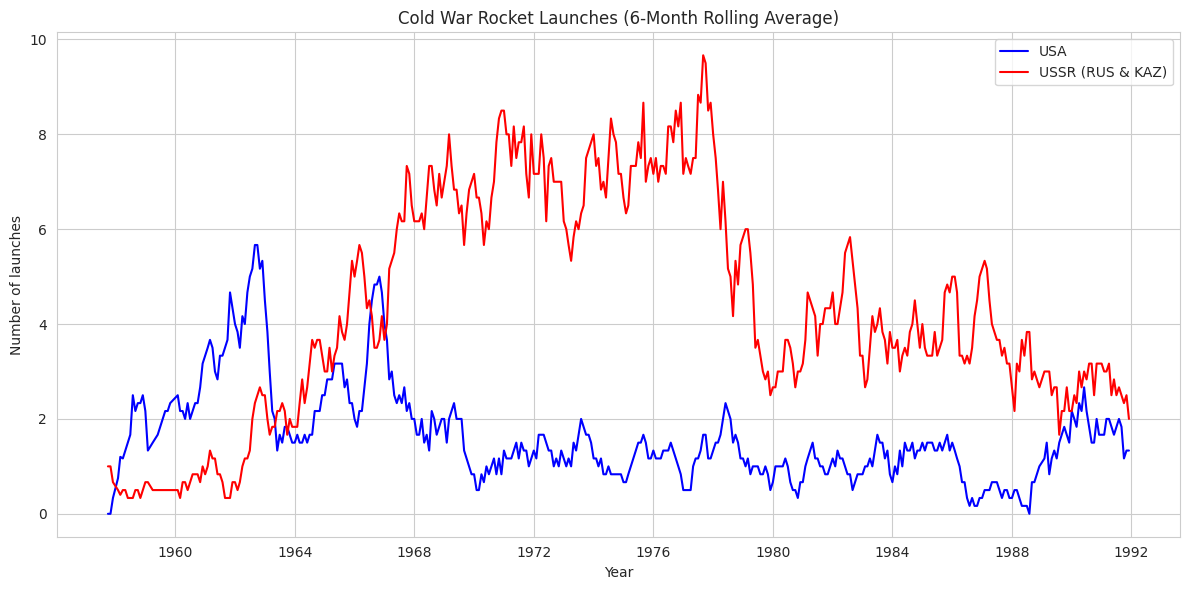

In [219]:
# 6 months rolling average
rolling_cold_war_df = pivot_cold_war_launches.rolling(window=6, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(pivot_cold_war_launches.index, rolling_cold_war_df['USA'], label='USA', color='blue')
plt.plot(pivot_cold_war_launches.index, rolling_cold_war_df['USSR'], label='USSR (RUS & KAZ)', color='red')
plt.title('Cold War Rocket Launches (6-Month Rolling Average)')
plt.xlabel('Year')
plt.ylabel('Number of launches')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [220]:
pre1992_df = df_data_clean[
    (df_data_clean['Year_Month_dt'] < '1992-01-01') &
    (df_data_clean['Country_ISO'].isin(['USA', 'RUS', 'KAZ']))
]

# Clasify as USA or USSR
pre1992_df['Bloc'] = pre1992_df['Country_ISO'].replace({'RUS': 'USSR', 'KAZ': 'USSR', 'USA': 'USA'})

# Count launches
launch_counts = pre1992_df['Bloc'].value_counts().reset_index()
launch_counts.columns = ['Country', 'Launches']

fig = px.pie(launch_counts, names='Country', values='Launches', color='Country',
             title='Total Launches During Cold War (Pre-1992): USA vs USSR',
             color_discrete_map={'USA': 'blue', 'USSR': 'red'})


fig.show()

<ipython-input-220-1584206051>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [221]:
# Filter the data frame for USA and USSR launches only
superpowers_launches = df_data_clean[df_data_clean['Country_ISO'].isin(['USA', 'RUS', 'KAZ'])]
# New Bloc column to be able to group by USSR of USA
superpowers_launches['Bloc'] = cold_war_launches['Country_ISO'].replace({'RUS': 'USSR', 'KAZ': 'USSR', 'USA': 'USA'})
# Group by bloc and date (Year_Month_dt & Bloc)
superpowers_by_bloc = cold_war_launches.groupby(['Year', 'Bloc']).size().reset_index(name='count')
superpowers_by_bloc.head()

<ipython-input-221-1033448376>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Bloc,count
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16


In [222]:
fig = px.bar(superpowers_by_bloc, x='Year', y='count', color='Bloc',
              barmode='group',
              title='Total Rocket Launches Year-on-Year: USA vs USSR',
              color_discrete_map={'USA': 'blue', 'USSR': 'red'})
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Launches')
fig.show()


## Chart the Total Number of Mission Failures Year on Year.

In [223]:
failures_count = df_data_clean[df_data_clean['Mission_Status'] == 'Failure'].groupby('Year').size().reset_index(name='count')
failures_count.head()

,Year,count
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17


In [224]:
fig = px.bar(failures_count, x='Year', y='count',
              title='Number of mission failures Year on Year',
              color_discrete_sequence=['cadetblue'])
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Number of failed launches')
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [225]:
failures_count['%change'] = failures_count['count'].pct_change() * 100
# Replace first year NaN with 0
failures_count.loc[0, '%change'] = 0
# Rounding to 2 decimals
failures_count['%change'] = failures_count['%change'].round(2)
failures_count.head()

,Year,count,%change
0,1957,1,0.00
1,1958,20,"1,900.00"
2,1959,9,-55.00
3,1960,20,122.22
4,1961,17,-15.00


In [226]:
# 1. Simple plot with absolut values
fig1 = px.line(failures_count, x='Year', y='count', markers=True,
              title='Number of Mission Failures Over Time')
fig1.update_layout(xaxis_title='Year', yaxis_title='Number of Failures')

# 2. Adding moving average to see a tendency (2 years window)
failures_count['moving_avg'] = failures_count['count'].rolling(window=2).mean()
failures_count['moving_avg'] = failures_count['moving_avg'].fillna(failures_count['count'])

# 3. Baseline 1957 (first year)
base_value = failures_count.loc[0, 'count']
failures_count['index_to_base'] = (failures_count['count'] / base_value) * 100

# Combined graph to analyze tendencies
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=('Mission Failures Count with Moving Average',
                                  'Growth Index (1957=100)'))

# Absolut count chart with moving average
fig.add_trace(
    go.Bar(x=failures_count['Year'], y=failures_count['count'], name='Failures'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=failures_count['Year'], y=failures_count['moving_avg'],
               name='2-Year Moving Avg', line=dict(color='red')),
    row=1, col=1
)

# Relative index chart
fig.add_trace(
    go.Scatter(x=failures_count['Year'], y=failures_count['index_to_base'],
               name='Index (1957=100)', line=dict(color='green'), mode='lines+markers'),
    row=2, col=1
)

# Reference line for baseline
fig.add_shape(type="line", x0=min(failures_count['Year']), x1=max(failures_count['Year']),
             y0=100, y1=100, line=dict(color="gray", width=1, dash="dash"),
             row=2, col=1)

fig.update_layout(height=700, title_text="Mission Failures Analysis Over Time")
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="Number of Failures", row=1, col=1)
fig.update_yaxes(title_text="Index Value (Base Year=100)", row=2, col=1)

fig.show()

Initially, the failed missions are higher and start lowering down and stabilizing around 1980 and stay relatively stable.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [227]:
# Group by max num of launches among all countries
total_launches_by_country = df_data_clean.groupby(['Year', 'Country_ISO']).size().reset_index(name='total_launches')
total_leader = total_launches_by_country.sort_values(['Year', 'total_launches'], ascending=[True, False])
total_leader = total_leader.groupby('Year').first().reset_index()

# Group by max num of successful launches among all countries
successful_launches_by_country = df_data_clean[df_data_clean['Mission_Status'] == 'Success'].groupby(['Year', 'Country_ISO']).size().reset_index(name='successful_launches')
successful_leader = successful_launches_by_country.sort_values(['Year', 'successful_launches'], ascending=[True, False])
successful_leader = successful_leader.groupby('Year').first().reset_index()


In [228]:
# Create consistent color mapping
all_countries = set(total_leader['Country_ISO']).union(set(successful_leader['Country_ISO']))
colors = plt.cm.Set3(np.linspace(0, 1, len(all_countries)))
color_map = dict(zip(all_countries, colors))

# Convert matplotlib colors to plotly format (hex)
def rgba_to_hex(rgba_color):
    return f'rgb({int(rgba_color[0]*255)}, {int(rgba_color[1]*255)}, {int(rgba_color[2]*255)})'

plotly_color_map = {country: rgba_to_hex(color) for country, color in color_map.items()}

# Create subplots
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Leading Country in Total Launches by Year',
                                   'Leading Country in Successful Launches by Year'),
                    vertical_spacing=0.08)

# Chart 1: Total launches
fig.add_trace(
    go.Bar(x=total_leader['Year'],
           y=total_leader['total_launches'],
           marker_color=[plotly_color_map[country] for country in total_leader['Country_ISO']],
           hovertemplate='<b>%{customdata}</b><br>Year: %{x}<br>Total Launches: %{y}<extra></extra>',
           customdata=total_leader['Country_ISO'],
           name='Total Launches'),
    row=1, col=1
)

# Chart 2: Successful launches
fig.add_trace(
    go.Bar(x=successful_leader['Year'],
           y=successful_leader['successful_launches'],
           marker_color=[plotly_color_map[country] for country in successful_leader['Country_ISO']],
           hovertemplate='<b>%{customdata}</b><br>Year: %{x}<br>Successful Launches: %{y}<extra></extra>',
           customdata=successful_leader['Country_ISO'],
           name='Successful Launches'),
    row=2, col=1
)

fig.update_layout(height=600, showlegend=False)
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [229]:
# Group by max num of launches among all organisations
total_launches_by_org = df_data_clean.groupby(['Year', 'Organisation']).size().reset_index(name='launches_max')
org_leader = total_launches_by_org.sort_values(['Year', 'launches_max'], ascending=[True, False])
org_leader = org_leader.groupby('Year').first().reset_index()

org_leader.head()

,Year,Organisation,launches_max
0,1957,RVSN USSR,2
1,1958,US Navy,12
2,1959,US Air Force,10
3,1960,US Air Force,21
4,1961,US Air Force,23


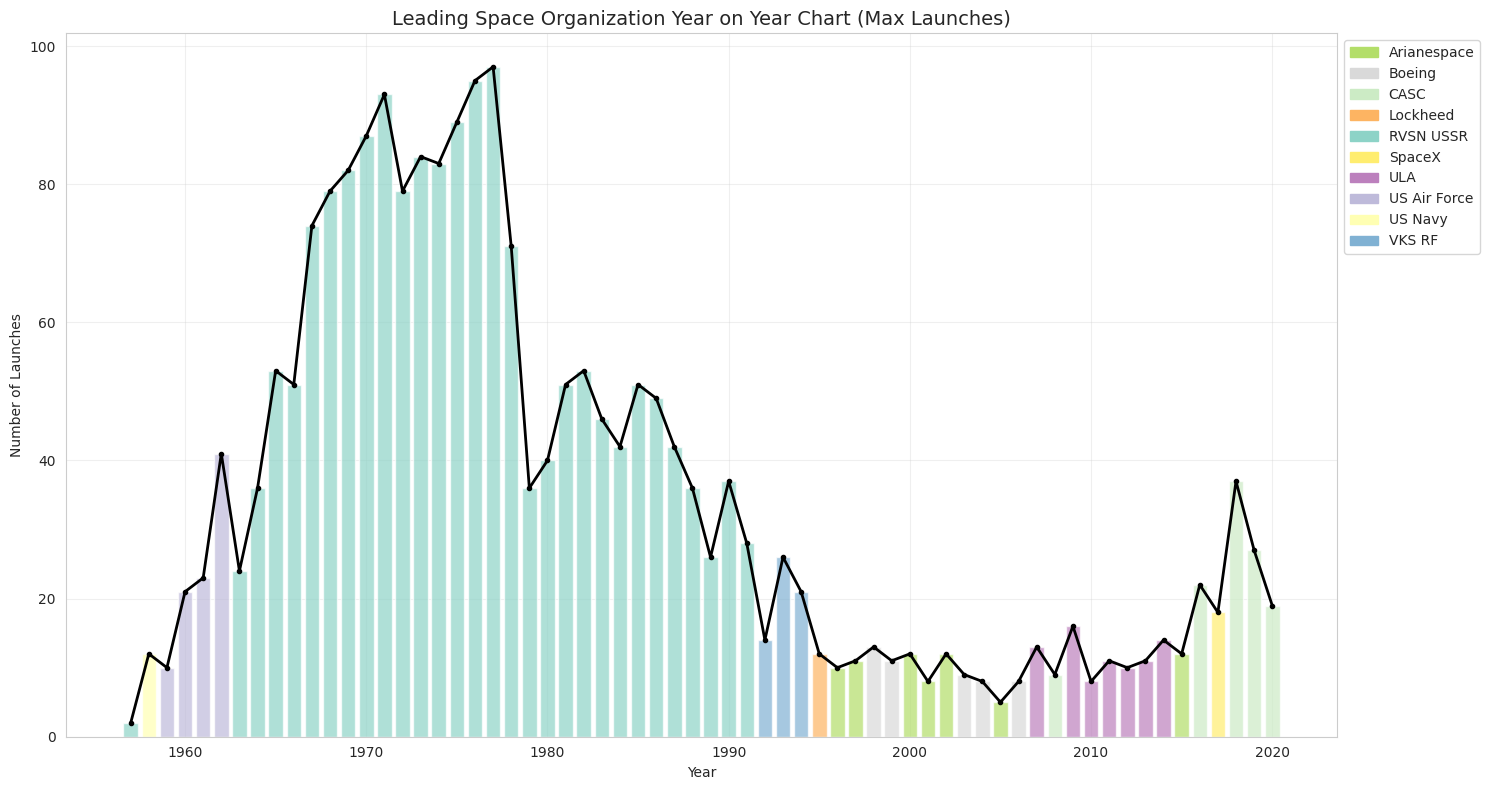

In [230]:
# Create NEW color mapping specifically for organizations
orgs = org_leader['Organisation'].unique()
org_colors_palette = plt.cm.Set3(np.linspace(0, 1, len(orgs)))
org_color_map = dict(zip(orgs, org_colors_palette))

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Create colors for each organization using the new mapping
org_colors = [org_color_map[org] for org in org_leader['Organisation']]

# Bar chart
bars = ax.bar(org_leader['Year'], org_leader['launches_max'],
              color=org_colors, alpha=0.7, label='Max Launches')

# Line chart overlay
ax.plot(org_leader['Year'], org_leader['launches_max'],
        color='black', linewidth=2, marker='o', markersize=3, label='Trend')

# Formatting
ax.set_title('Leading Space Organization Year on Year Chart (Max Launches)', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Launches')
ax.grid(True, alpha=0.3)

# Legend for organizations
handles = [plt.Rectangle((0,0),1,1, color=org_color_map[org]) for org in sorted(orgs)]
ax.legend(handles, sorted(orgs), loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()